# 1. Importamos las librerias necesarias

In [35]:
#Analisis de datos y graficas.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Preprocesamiento de datos.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Librerias de Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Métricas de Validación

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Cargamos la Data y empezamos a preparar

In [2]:
df = pd.read_csv("housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#Quitamos los valores nulos. Vemos que en 'total_bedrooms' faltan datos

df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [4]:

df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
#Convertimos la variable categorica "Ocean Proximity" a variables Dummy
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_<1H OCEAN   20433 non-null  uint8  
 10  ocean_proximity_INLAND      20433 non-null  uint8  
 11  ocean_proximity_ISLAND      20433 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20433 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  204

### Separamos la data

In [6]:
X = df.drop('median_house_value', axis = 1)
y = df["median_house_value"]

print(X.shape, y.shape)


(20433, 13) (20433,)


In [8]:
#Lo convertimos en un lista de numpy
X = np.array(X)
y = np.array(y)

### Dividimos en entrenamiento y prueba

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16346, 13) (4087, 13) (16346,) (4087,)


### Escalamos la data

In [15]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# 3. Construimos, compilamos y ajustamos el modelo

##### Para construirlo usaremos el método Secuencial de Keras
##### Especificamos el optimizador (rmsprop o Adam) (Ayudan a ajustar el peso de la red durante entrenamiento y minimiza la función de perdida)
##### Definimos funcion de perdida (MSE o MAE)
##### Ajustamos el modelo (Crearemos una nueva variable para evaluar las curvas de aprendizaje)
##### EarlyStopping para prevenir el SobreAjuste 

### Empezamos a construir

In [16]:
model = Sequential() #Para construir la red de manera simple.
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) #1000 neuronas, 
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) #Nodo de salida
model.summary() # Ver la arquitectura del modelo

/Users/lguillen/Library/Python/3.10/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        14,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,001 (2.44 MB)

 Trainable params: 640,001 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

### Compilamos el modelo

In [17]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [18]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Ajsutamos el modelo

In [19]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)


Epoch 1/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 38391123968.0000 - mae: 156456.0781 - val_loss: 8082553344.0000 - val_mae: 69896.0391
Epoch 2/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7804338176.0000 - mae: 67852.5547 - val_loss: 5972967936.0000 - val_mae: 57366.4844
Epoch 3/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6094240256.0000 - mae: 57667.5547 - val_loss: 5089219584.0000 - val_mae: 51626.4688
Epoch 4/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5247760384.0000 - mae: 52466.8516 - val_loss: 4956732416.0000 - val_mae: 50266.6758
Epoch 5/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5235079680.0000 - mae: 52322.5664 - val_loss: 4889319936.0000 - val_mae: 49645.7695
Epoch 6/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5252243968.0000 - mae: 51935.4883 - val_loss: 4855705600.0000 - val_mae: 51262.7656
Epoch 7/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4903256576.0000 - mae: 50442.4297 - val_loss: 4771315200.000

327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4120782336.0000 - mae: 45326.8945 - val_loss: 4046210304.0000 - val_mae: 44214.8008
Epoch 47/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4094255616.0000 - mae: 45140.7383 - val_loss: 4058740224.0000 - val_mae: 45179.7461
Epoch 48/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4045835008.0000 - mae: 44747.8359 - val_loss: 4153609216.0000 - val_mae: 46437.1328
Epoch 49/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4119644672.0000 - mae: 45164.9453 - val_loss: 4120476928.0000 - val_mae: 45872.3672
Epoch 50/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4120348160.0000 - mae: 45141.0469 - val_loss: 3971839232.0000 - val_mae: 43776.7109
Epoch 51/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4090997504.0000 - mae: 44796.4219 - val_loss: 4071860736.0000 - val_mae: 43518.4180
Epoch 52/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4157864192.0000 - mae: 44790.1328 - val_loss: 4065986048.0000 - val_m

327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3448741888.0000 - mae: 40683.8711 - val_loss: 3384096256.0000 - val_mae: 40215.1328
Epoch 92/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3353150720.0000 - mae: 40346.1836 - val_loss: 3754527488.0000 - val_mae: 43246.1250
Epoch 93/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3518534144.0000 - mae: 40952.2070 - val_loss: 3379114496.0000 - val_mae: 39048.1133
Epoch 94/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3401948928.0000 - mae: 40335.1875 - val_loss: 3463399168.0000 - val_mae: 39325.3438
Epoch 95/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3325601792.0000 - mae: 39650.4531 - val_loss: 3562246144.0000 - val_mae: 39945.5352
Epoch 96/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3240375808.0000 - mae: 39516.1641 - val_loss: 3270554368.0000 - val_mae: 38919.2266
Epoch 97/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3304283648.0000 - mae: 39779.8984 - val_loss: 3253662208.0000 - val_m

327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3020825600.0000 - mae: 37785.5156 - val_loss: 3020236288.0000 - val_mae: 36749.3086
Epoch 137/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3029351168.0000 - mae: 37944.6992 - val_loss: 3307515136.0000 - val_mae: 40020.6836
Epoch 138/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3126132992.0000 - mae: 38130.8359 - val_loss: 3061204992.0000 - val_mae: 38119.7422
Epoch 139/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3047521280.0000 - mae: 37792.1289 - val_loss: 3077697792.0000 - val_mae: 37922.7578
Epoch 140/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3126963712.0000 - mae: 37931.9258 - val_loss: 2994575616.0000 - val_mae: 36598.6328
Epoch 141/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2976523520.0000 - mae: 37493.1836 - val_loss: 3124309760.0000 - val_mae: 37123.9727
Epoch 142/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2823393280.0000 - mae: 36470.6953 - val_loss: 3105832192.0000 -

327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2836149248.0000 - mae: 35973.8828 - val_loss: 2890539520.0000 - val_mae: 35898.7617
Epoch 182/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2783193856.0000 - mae: 36107.0234 - val_loss: 2874939904.0000 - val_mae: 36428.6289
Epoch 183/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2817771776.0000 - mae: 36169.7227 - val_loss: 3082049792.0000 - val_mae: 36841.7812
Epoch 184/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2936570368.0000 - mae: 36867.1406 - val_loss: 2818905344.0000 - val_mae: 35332.6680
Epoch 185/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2778538240.0000 - mae: 36120.4180 - val_loss: 3311120640.0000 - val_mae: 41523.4609
Epoch 186/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2818590464.0000 - mae: 36097.6250 - val_loss: 2853488128.0000 - val_mae: 36122.5039
Epoch 187/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2802533632.0000 - mae: 35824.8359 - val_loss: 3408937472.0000 -

327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2706005760.0000 - mae: 35036.6797 - val_loss: 2746008576.0000 - val_mae: 34792.3828
Epoch 227/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2655136768.0000 - mae: 34989.1719 - val_loss: 2891763712.0000 - val_mae: 37040.3906
Epoch 228/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2709169408.0000 - mae: 35645.8047 - val_loss: 2763038464.0000 - val_mae: 34819.8359
Epoch 229/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2812516864.0000 - mae: 35687.6641 - val_loss: 2929611520.0000 - val_mae: 35694.8398
Epoch 230/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2714759424.0000 - mae: 35248.9453 - val_loss: 2797949696.0000 - val_mae: 35104.4375
Epoch 231/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2643447040.0000 - mae: 34964.1953 - val_loss: 2729349888.0000 - val_mae: 34568.4102
Epoch 232/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2717616640.0000 - mae: 35340.5391 - val_loss: 2734820352.0000 -

327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2660221184.0000 - mae: 34765.3633 - val_loss: 2605555712.0000 - val_mae: 34602.3125
Epoch 272/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2607181312.0000 - mae: 34424.6289 - val_loss: 2660809472.0000 - val_mae: 34505.5938
Epoch 273/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2593894912.0000 - mae: 34415.6523 - val_loss: 2630236928.0000 - val_mae: 34355.7617
Epoch 274/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2522081536.0000 - mae: 34092.7773 - val_loss: 2689225216.0000 - val_mae: 34185.7930
Epoch 275/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2572820480.0000 - mae: 34543.9102 - val_loss: 2799248128.0000 - val_mae: 36467.7812
Epoch 276/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2544739072.0000 - mae: 34325.8203 - val_loss: 2693320960.0000 - val_mae: 34292.5977
Epoch 277/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2568354816.0000 - mae: 34115.1328 - val_loss: 2766694656.0000 -

327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2510819840.0000 - mae: 33932.6172 - val_loss: 2991411968.0000 - val_mae: 36022.3438
Epoch 317/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2518084096.0000 - mae: 34076.0859 - val_loss: 2581765120.0000 - val_mae: 33845.8438
Epoch 318/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2511156224.0000 - mae: 33943.0391 - val_loss: 2570253056.0000 - val_mae: 33521.8906
Epoch 319/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2511989504.0000 - mae: 33780.0781 - val_loss: 2715702784.0000 - val_mae: 36091.0000
Epoch 320/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2482426112.0000 - mae: 33803.4102 - val_loss: 2833562880.0000 - val_mae: 37374.0273
Epoch 321/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2404070656.0000 - mae: 33246.7031 - val_loss: 2560945664.0000 - val_mae: 34059.9336
Epoch 322/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2539414784.0000 - mae: 34054.7617 - val_loss: 2793661440.0000 -

327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2391959040.0000 - mae: 33006.8047 - val_loss: 2562443520.0000 - val_mae: 34162.7656
Epoch 362/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2479020288.0000 - mae: 33584.5039 - val_loss: 2582791936.0000 - val_mae: 33684.7812
Epoch 363/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2398618624.0000 - mae: 33070.3867 - val_loss: 2599847424.0000 - val_mae: 33588.6875
Epoch 364/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2472437504.0000 - mae: 33281.9414 - val_loss: 2616040448.0000 - val_mae: 34104.2539
Epoch 365/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2421487616.0000 - mae: 32977.2539 - val_loss: 2557825280.0000 - val_mae: 33197.4688
Epoch 366/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2422536192.0000 - mae: 33238.6562 - val_loss: 2688991744.0000 - val_mae: 34008.8828
Epoch 367/5000
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2357182976.0000 - mae: 32985.8945 - val_loss: 2745905664.0000 -

### Graficamos

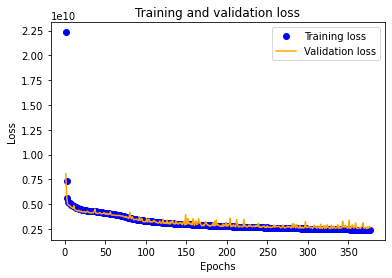

In [20]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # Numero de Epochs, para X
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step


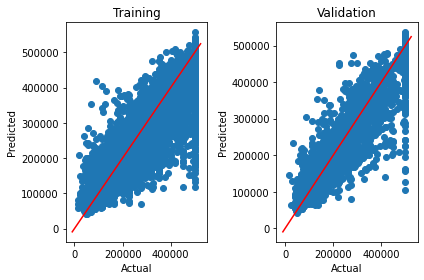

In [39]:
fig, axes = plt.subplots(1,2) # 1 fila, dos columnas


# Entrenamiento
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# Linea de 45 grados
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validacion
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# Linea de 45 grados
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')
# Pequeña separación entre gráficas.
fig.tight_layout()




# 4. Predecimos

In [24]:

pred = model.predict(X_test)
pred

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


array([[165840.31],
       [130271.96],
       [ 67782.52],
       ...,
       [213650.75],
       [308183.25],
       [236336.  ]], dtype=float32)

# 5. Métricas

In [27]:


trainpreds = model.predict(X_train)

print("MAE Entrenamiento: ",mean_absolute_error(y_train, trainpreds)) # Entrenamiento
print("MAE Prueba: ",mean_absolute_error(y_test, pred)) # Prueba

511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
MAE Entrenamiento:  32449.718281374266
MAE Prueba:  33153.041688012294


In [34]:
mse = mean_squared_error(y_test, pred)
print("MSE: ",mse)

MSE:  2541162185.400551


In [37]:
r2 = r2_score(y_test, pred)
print("R²: ", r2)


R²:  0.8018098527597155


# 6. Analisis

#### MAE es el error promedio de las predicciones de mi modelo. El hecho de que ambos sean muy similiares es un indicador que no tengo sobreajuste en mi modelo y es consistente al generalizar

#### MSE en este caso queda relativamente grande reflejando la variabilidad de los errores en las predicciones y que los errores grandes son penalizados más severamente. 

#### R² de 0.8018 indica que aproximadamente el 80.18% de la variabilidad en la variable dependiente es explicada por el modelo. El modelo tiene buen ajuste a los datos.